# Laboratorio 5

Integrantes: 

    - Francis Aguilar - 22243 
    - Diego García - 22404 
    - Angela García -22869 

enlace al repositorio: https://github.com/angelargd8/lab5-modsim

## Teoría 

**1. ¿Cuál es la característica más definitoria de una red libre de escala que la diferencia de una red aleatoria (Erdős-Rényi)? Explique por qué esta característica obliga a los modeladores a ir más allá de los modelos que se basan únicamente en propiedades promedio (como el modelo SIR clásico).** 

La característica más definitoria de una red libre de escala que la diferencia de una red aleatoria es la distribución de gradoss con cola pesada y la existencia de hubs, la diferencia es que en una red aleatoria la distribución de grados sigue la distribución de Poisson, mientras que la red libre de escala sigue la de la ley de la potencia. Esto lo que hace es que obliga a los modelos homógeneos promedio como el SIR, porque los hubs dominan la dinámica de propagación y no se puede ignorar con un número promedio de contactos. 

**2. Considere la fórmula de la ley de potencia vista en clase. ¿Qué implica un valor menor de gamma (por ejemplo, 2,1 frente a 3,5) sobre la prevalencia de nodos altamente conectados en la red?**

Si gamma tuviera un valor de 3.5, sería un valor alto, entonces la probabilidad decae rápido, la red todavía tendría hubs, aunque los nodos con muchas conexiones sería raro y la red sería homogénea. 
Y si gamma tuviera 2.1 sería un valor bajo, y la probabilidad decaería lentamente, porque la cola sería pesada y los nodos tendrían un grado muy alto y más frecuentes. Además, al tener una mayor prevalencia la red es más heterogénea.


**3. ¿Por qué el número reproductivo básico R0 para una enfermedad que se propaga en una red libre de escala depende de la varianza de la distribución de grados, no solo de la media?**

El R0 en redes libres de escala depende de la varianza porque los hubs los que son pocos pero muy conectados dominan la transmisión y al ignorar la varianza y si solo se usa la media, entonces subestimaría el portencial de propagación. Ya que se tiene que tomar en cuenta que en las redes libres existe la escala la heterogeneidad. Por lo tanto, no todos los nodos tienen el mismo grado, ya que unos tienen hubs con miles de conexiones. 



**4. ¿Por qué las intervenciones dirigidas (p. ej., centrar las pruebas, el uso de mascarillas o la vacunación en los centros de la red) son particularmente eficaces y eficientes en una red sin escala en comparación con una red aleatoria? Explíquelo desde una perspectiva matemática y práctica.**

En una red aleatoria, la distribución de grados es aproximadamente Poisson, la mayoría de los nodos tienen un número de conexiones cercano a la media y todos los nodos son parecidos.

Se tiene que tomar en cuenta que el número reproducitov básico se aproxima como:
$$
R_0 ∝ β * (⟨k^2⟩​)/(⟨k⟩)
$$
Y dado a que
$$
⟨k^2⟩ ≈⟨k^2⟩ + ⟨k⟩
$$


Entonces si solo se atacan unos pocos realmente no va a cambiar el promedio.


Mientras, que en la red libre escala, la distribución sigue la ley de la potencia que es 
$$
P(k) ∼ k^{\text{−γ}}
$$

Y eso implica que ⟨k^2⟩ puede ser muy grande o divergir cuando γ =< 3 
$$
⟨k^2⟩ ≈⟨k^2⟩ + ⟨k⟩
$$
y aquí pocos hubs se inflan de manera desproporcionada y si se eliminan o se protegen a esos hubs ⟨k^2⟩ se reduce draticamente.

Entonces, la heterogeneidad que hacen las redes libres de escala más vulnerables a epidemuas también las hacec más fáciles de controlar si se actua de una forma dirigida.




## Práctica

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Reproducibilidad
NP_SEED = 42
NX_SEED = 42
rng = np.random.default_rng(NP_SEED)

In [ ]:
# === Parámetros globales de la práctica ===
N = 1000         # número de nodos
m = 3            # parámetro Barabási–Albert

G_ba = None; deg_ba = None; mean_ba = None; var_ba = None
G_er = None; deg_er = None; mean_er = None; var_er = None


In [6]:
# Red libre de escala (Barabási–Albert)
G_ba = nx.barabasi_albert_graph(N, m, seed=NX_SEED)

print("Nodos:", G_ba.number_of_nodes(), " | Aristas:", G_ba.number_of_edges())


Nodos: 1000  | Aristas: 2991


In [ ]:
deg_ba = np.fromiter((d for _, d in G_ba.degree()), dtype=int)
mean_ba = float(deg_ba.mean())
var_ba  = float(deg_ba.var(ddof=0))

print(f"BA — N={len(deg_ba)}, k̄={mean_ba:.3f} (≈ esperado {2*m}), Var={var_ba:.3f}, "
      f"k_min={deg_ba.min()}, k_max={deg_ba.max()}")

BA — N=1000, k̄=5.982 (≈ esperado 6), Var=52.766, k_min=3, k_max=93


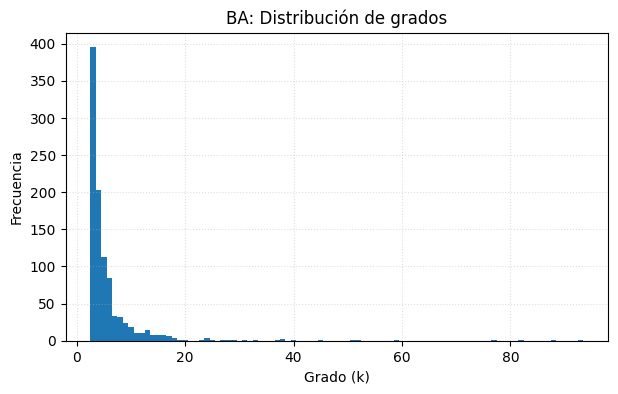

In [9]:
bins = np.arange(deg_ba.min() - 0.5, deg_ba.max() + 1.5, 1)
plt.figure(figsize=(7,4))
plt.hist(deg_ba, bins=bins)
plt.xlabel("Grado (k)")
plt.ylabel("Frecuencia")
plt.title("BA: Distribución de grados")
plt.grid(True, linestyle=":", alpha=0.4)
plt.show()

### Informe de hallazgos

**Describe la marcada diferencia en la forma de los dos histogramas de escala lineal. ¿Qué te dice la forma de la distribución de la red sin escala sobre su estructura?**
BA muestra una cola pesada: muchísimos nodos con grado bajo (pico cerca de 3) y unos pocos hubs con grados muy altos (hasta 93), lo que da varianza alta (52.8).

**¿Qué revela el gráfico logarítmico de la distribución de grados de la red sin escala?¿Qué confirma la línea de tendencia aproximadamente lineal?**<br>
El gráfico logaritmico de la disrtibución BA muestra una cola casi lineal, lo que demuestra la ley de potencia aproximada
$$
P(k) ∼ k^{\text{−γ}}
$$
Esta tendencia casi lineal confirma la falta de escala típica de grado y presencia de hubs que dominan la conectividad y la dinámica de propagación.